# Lesson 33 and 34 - Examples

This notebook provides detailed solutions and some numerical demonstrations of the examples presented in class.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Example 1

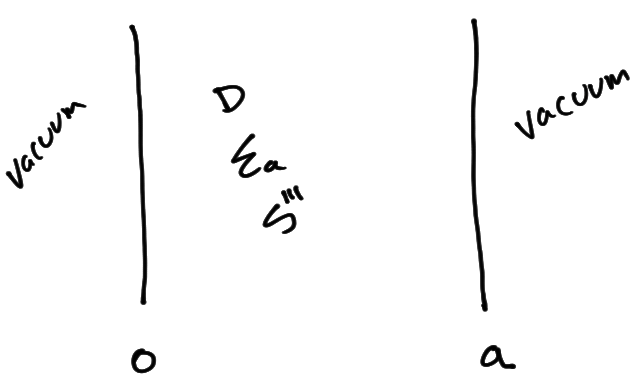

Consider a slab of width $a$ with a uniform source $s_0$  (n/cm$^3$-s) subject to *vacuum* on the left and *reflection* on the right.  Determine $\phi(x)$, $J(x)$, and $J^{\text{out}}(0)$.

**Solution**

**Step 1**: Write down the equations:

$$
\begin{align*}
\tag{diffusion equation}
  -D \frac{d^2\phi}{dx^2} + \Sigma_a \phi(x) &= s_0 \\
\tag{BC at $x=0$}
  J^{\text{in}}(0) = \frac{\phi(0)}{4} - \frac{D}{2} \frac{d\phi}{dx}\Bigg |_{x=0} &= 0 \\
\tag{BC at $x=a$}
  J(0) = -D\frac{d\phi}{dx}\Bigg |_{x=a} &= 0
\end{align*}
$$

**Step 2**: Find the homogeneous solution:

We've already found this (in Lesson 32) for constant $D$, $\Sigma_a$, and $L=\sqrt{D/\Sigma_a}$ to be:

$$
\tag{homogeneous solution}
 \phi_h(x) = C_0 e^{x/L} + C_1 e^{-x/L}  \, .
$$

**Step 3**: Find the particular solution:

We've already found this (in Lesson 32) for a constant source to be

$$
\tag{particular solution}
  \phi_p(x) = \frac{L^2 s_0}{D} \, ,
$$

so

$$
 \tag{complete solution}
  \phi(x) =  C_0 e^{x/L} + C_1 e^{-x/L}  + \frac{L^2 s_0}{D} \, .
$$

**Step 4**: Apply the boundary conditions:

$$
\begin{align*}
  \tag{BC @ $x=0$}
  0 &= \frac{\phi(0)}{4} - \frac{D}{2} \frac{d\phi}{dx}\Bigg |_{x=0} \\
  \tag{substitute the complete solution into the BC}
   &= \frac{C_0 + C_1 + \frac{L^2 s_0}{D}}{4} - \frac{D}{2}\left ( \frac{C_0}{L} - \frac{C_1}{L} \right ) 
\end{align*}
$$
or
$$
\boxed{\left (\frac{1}{4} - \frac{D}{2L}\right ) C_0 +  \left (\frac{1}{4} + \frac{D}{2L}\right ) C_1
 =  -\frac{L^2 s_0}{4D}}
$$

$$
\begin{align*}
  \tag{BC at $x=a$}
 \frac{d\phi}{dx}\Bigg |_{x=a} 
   = \boxed{\frac{e^{a/L}}{L} C_0 - \frac{e^{-a/L}}{L} C_1 = 0} \, .
\end{align*}
$$


Solve for $C_0$ and $C_1$ to get
$$
\boxed{
  C_0 = \frac{\frac{-L^2 s_0}{4D}} { \left(\frac{1}{4} - \frac{D}{2L}\right ) +  \left (\frac{1}{4} + \frac{D}{2L}\right )e^{2a/L}  } }
$$
and
$$
  \boxed{ C_1 = \frac{\frac{-L^2 s_0 e^{2a/L}}{4D}} { \left(\frac{1}{4} - \frac{D}{2L}\right ) +  \left (\frac{1}{4} + \frac{D}{2L}\right )e^{2a/L}  } } \, .
$$

Finally,

$$
\tag{Solution 1}
\boxed{
 \phi(x) = \frac{s_0 L^2}{D}  \left ( 1   - \frac{\frac{1}{4} \left ( e^{x/L} +  e^{(2a-x)/L} \right ) } { \left(\frac{1}{4} - \frac{D}{2L}\right ) +  \left (\frac{1}{4} + \frac{D}{2L}\right )e^{2a/L} }  \right )
}
$$

The outgoing partial currents through a  boundary at $x = x_b$ can be determined by applying
$J^{\pm}(x_b) = \frac{\phi(x_b)}{4} \mp \frac{D}{2}\frac{d\phi}{dx}\Big |_{x = x_b}$, so 

$$
\begin{align*}
  J^{\text{out}}(0) 
    &= J^{-}(0) \\ 
    &= \frac{\phi(0)}{4} + \frac{D}{2}\frac{d\phi}{dx}\Big |_{x = 0} \\
    &= \frac{s_0 L^2}{4D}  \left ( 1   - \frac{\frac{1}{4} \left ( 1+  e^{2a/L} \right ) } { \left(\frac{1}{4} - \frac{D}{2L}\right ) +  \left (\frac{1}{4} + \frac{D}{2L}\right )e^{2a/L} }  \right )
    - \frac{s_0 L^2}{2}  \left ( \frac{\frac{1}{4L} \left ( 1 -  e^{2a/L} \right ) } { \left(\frac{1}{4} - \frac{D}{2L}\right ) +  \left (\frac{1}{4} + \frac{D}{2L}\right )e^{2a/L} }  \right )
\end{align*}
$$


**Step 5** 

Formal verification is left to you!  

To check this solution numerically, first define the known parameters:

In [2]:
a  = 10.0 # slab width (cm)
D  = 0.5  # diffusion coefficient (cm)
Σa = 0.2  # macroscopic absorption cross section (1/cm)
s0 = 1.0  # source strength (1/cm^3-s)
L = np.sqrt(D/Σa) # diffusion length (cm)

Then implement Solution 1 as a function:

In [3]:
def phi_1(x): 
    return (s0*L**2/D)*(1 - 0.25*(np.exp(x/L)+np.exp((2*a-x)/L))/((0.25-0.5*D/L)+(0.25+0.5*D/L)*np.exp(2*a/L)))

As a further check, we can evaluate $C_0$ and $C_1$ directly from the algebraic equations we found from applying the boundary conditions and then define a second function for $\phi(x)$:

In [4]:
A = np.array([[1/4-D/(2*L),   1/4+D/(2*L)],
              [np.exp(a/L)/L, -np.exp(-a/L)/L]])
b = np.array([-L**2*s0/(4*D),  0.0])
C = np.linalg.solve(A, b)
C

array([-9.83307560e-06, -3.06286835e+00])

Define $\phi(x) = C_0 e^{x/L} + C_1 e^{-x/L} + \frac{L^2 s_0}{D}$ with these constants:

In [5]:
phi_1_num = lambda x: C[0]*np.exp(x/L) + C[1]*np.exp(-x/L) + L**2*s0/D
J_1_num = lambda x: -D*(C[0]*np.exp(x/L)/L - C[1]*np.exp(-x/L)/L)

Finally, plot the solution:

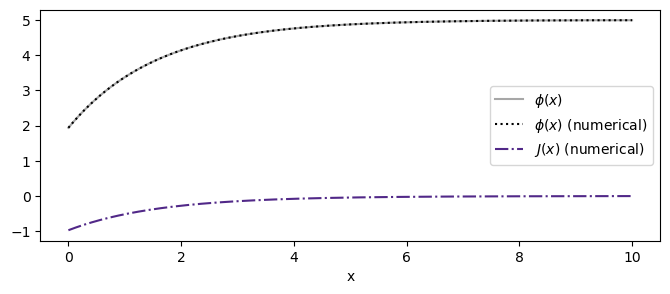

In [6]:
x = np.linspace(0.0, a, 1000)
plt.figure(figsize=(8,3))
g = "#a7a7a7"
p = "#512888"
plt.plot(x, phi_1(x), '-', color=g, label="$\phi(x)$")
plt.plot(x, phi_1_num(x), 'k:', label="$\phi(x)$ (numerical)");
plt.plot(x, J_1_num(x), '-.', color=p, label="$J(x)$ (numerical)");
plt.xlabel("x");
plt.legend();

## Example 2

Consider a slab with two homogeneous regions.  Region I extends from $x=-a$ to $x=0$, while region II extends from $x=0$ to $x=a$.  Let $\Sigma_a^I$, $D^I$, $L_I$, and $s_I$ denote parameters for region I with similar notation for region II.  Assuming vacuum conditions at $x=-a$ and $x=a$, construct the system of four algebraic equations for the four coefficients of integration.

**Solution**

**Step 1**.  The equations to be solved are 

$$
\begin{align*}
\tag{diffusion equation in region I}
 -\frac{d^2 \phi_I}{dx^2}+\frac{1}{L_I^2} \phi_{I}(x) &= \frac{s_I}{D^I} \qquad -a \leq x \leq 0  \\
\tag{diffusion equation in region II}
 -\frac{d^2 \phi_{II}}{dx^2}+\frac{1}{L_{II}^2} \phi_{II}(x) &= \frac{s_{II}}{D^{II}} \qquad 0 \leq x \leq a  \\
\end{align*}
$$

$$
\begin{align*}
\tag{BC at $x=-a$}
  J^{\text{in}}(-a) = \frac{\phi_I(-a)}{4} - \frac{D^I}{2} \frac{d\phi_I}{dx}\Bigg |_{x=-a} &= 0 \\
\tag{BC at $x=a$}
  J^{\text{in}}(a) = \frac{\phi_{II}(a)}{4} + \frac{D^{II}}{2} \frac{d\phi_{II}}{dx}\Bigg |_{x=-a} &= 0 \\
\end{align*}
$$

$$
\begin{align*}
\tag{continuity of $\phi(x)$ at $x=0$}
  \phi_I(0) &= \phi_{II}(0) \\
\tag{continuity of $J(x)$ at $x=0$}
   -D^I \frac{d\phi_I}{dx} \Bigg |_{x=0} &=  -D^{II} \frac{d\phi_{II}}{dx} \Bigg |_{x=0}
\end{align*}
$$

**Steps 2 and 3**. We already know the basic form for the complete solution in each region:

$$
\begin{align*}
 \tag{complete solution in region I}
  \phi_I(x) &=  C_0 e^{x/L_I} + C_1 e^{-x/L_I}  + \frac{L_I^2 s_I}{D^I} \, , \qquad -a \leq x \leq 0  \\
 \tag{complete solution in region II}
  \phi_{II}(x) &=  C_2 e^{x/L_{II}} + C_3 e^{-x/L_{II}}  + \frac{L_{II}^2 s_{II}}{D^{II}} \, , \qquad 0 \leq x \leq a  \\
\end{align*}
$$

**Step 4**. Apply the boundary and continuity conditions:

$$
\begin{align*}
\tag{BC at $x=-a$}
  \frac{C_0 e^{-a/L_{I}} + C_1 e^{a/L_{I}} + \frac{L_{I}^2 s_{I}}{D^{I}}}{4}
   - \frac{D^{I}}{2} \frac{ C_0 e^{-a/L_{I}} - C_1 e^{a/L_{I}}  }{L_{I}} &= 0 \\
\tag{BC at $x= a$}
  \frac{C_2 e^{a/L_{II}} + C_3 e^{-a/L_{II}} + \frac{L_{II}^2 s_{II}}{D^{II}}}{4}
   + \frac{D^{II}}{2} \frac{ C_2 e^{a/L_{II}} - C_3 e^{-a/L_{II}}  }{L_{II}} &= 0 \\
\tag{$\phi$ continuity}
C_0   + C_1   + \frac{L_{I}^2 s_{I}}{D^{I}}
 = C_2  + C_3   + \frac{L_{II}^2 s_{II}}{D^{II}} \\
\tag{$J$ continuity}
 -\frac{D^I}{L_I}(C_0 - C_1)  = -\frac{D^I}{L_{II}}(C_2 - C_3)
\end{align*}
$$

**Step 5**.  That's a lot of algebra!  Let's solve that system numerically...

In [7]:
# Define parameters
a = 10.0

D_I = 0.5
Σa_I = 0.1
L_I = np.sqrt(D_I/Σa_I)
s_I = 1.0

D_II = 1.0
Σa_II = 0.5
L_II = np.sqrt(D_II/Σa_II)
s_II = 2.0

In [8]:
A = np.array(
[[np.exp(-a/L_I)/4-(D_I/2)*(np.exp(-a/L_I)/L_I), np.exp(a/L_I)/4+(D_I/2)*(np.exp(a/L_I)/L_I), 0.0, 0.0],
 [0.0, 0.0, np.exp(a/L_II)/4+(D_II/2)*(np.exp(a/L_II)/L_II), np.exp(-a/L_II)/4-(D_II/2)*(np.exp(-a/L_II)/L_II)],
 [1.0, 1.0, -1.0, -1.0],
 [-D_I/L_I, D_I/L_I, D_II/L_II, -D_II/L_II]]
)
b = np.array([-L_I**2*s_I/(4*D_I),  
              -L_II**2*s_II/(4*D_II), 
              L_II**2*s_II/D_II - L_I**2*s_I/D_I, 
              0.0])
C = np.linalg.solve(A, b)
C

array([-4.51973279e+00, -7.87049727e-02, -1.40703526e-03,  1.40296927e+00])

In [9]:
phi_I  = lambda x: C[0]*np.exp(x/L_I) + C[1]*np.exp(-x/L_I) + L_I**2*s_I/D_I
J_I = lambda x:  -D_I/L_I * (C[0]*np.exp(x/L_I) - C[1]*np.exp(-x/L_I))
phi_II = lambda x: C[2]*np.exp(x/L_II) + C[3]*np.exp(-x/L_II) + L_II**2*s_II/D_II
J_II = lambda x:  -D_II/L_II * (C[2]*np.exp(x/L_II) - C[3]*np.exp(-x/L_II))

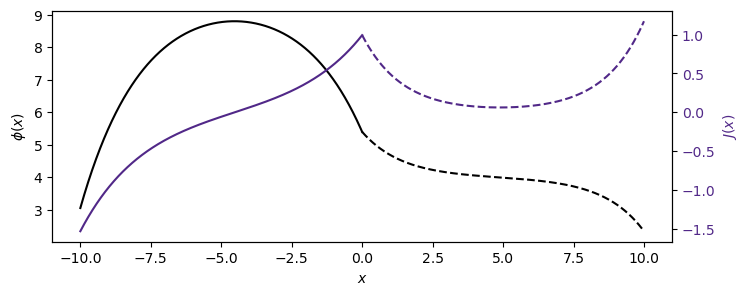

In [10]:
x_I = np.linspace(-a, 0.0, 1000)
x_II = np.linspace(0.0, a, 1000)
fig, ax1 = plt.subplots(figsize=(8,3))
ax1.plot(x_I, phi_I(x_I), "k")
ax1.plot(x_II, phi_II(x_II), "k--")
ax2 = ax1.twinx()
ax2.plot(x_I, J_I(x_I), "-", color=p)
ax2.plot(x_II, J_II(x_II), "--", color=p)
ax1.set_xlabel("$x$")
ax1.set_ylabel("$\phi(x)$");
ax2.set_ylabel("$J(x)$", color=p)
ax2.tick_params(axis="y", labelcolor=p)

## Example 3

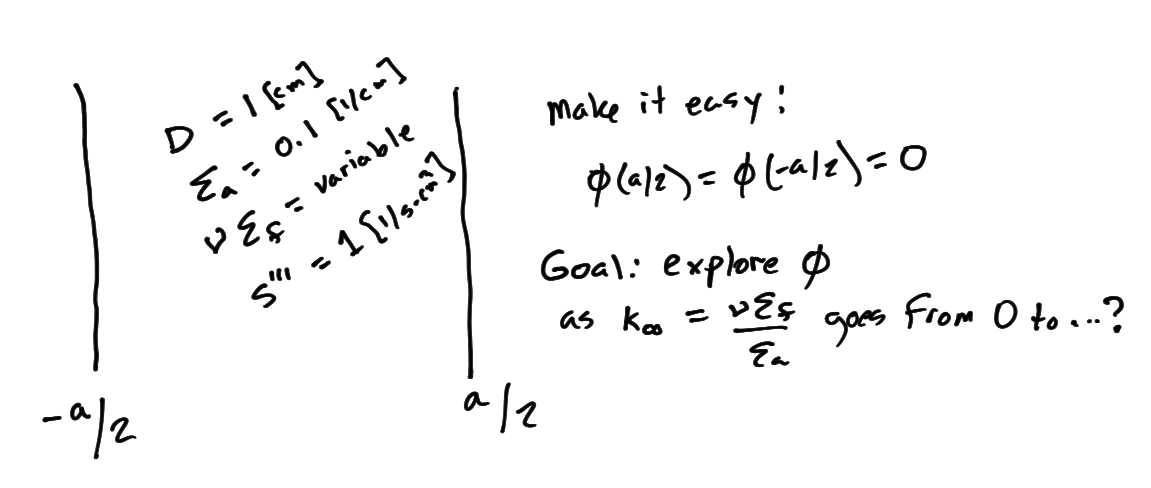

**Step 1**: The equations to be solved are 

$$
\begin{align*}
   -\frac{d^2 \phi}{dx^2} \pm \alpha^2 \phi(x) &= \frac{s'''}{D} \\
   \phi(-a/2) &= 0 \\
   \phi(a/2)  &= 0
\end{align*}
$$

where 

$$
\alpha = \begin{cases}
 \frac{1 - k_{\infty}}{L^2} & k_{\infty} < 1 \\
 \frac{k_{\infty} - 1}{L^2} & k_{\infty} > 1 \, ,
 \end{cases}
$$

$k_{\infty} = \nu\Sigma_f/\Sigma_a$, and $L = \sqrt{D/\Sigma_a}$.

**Step 2**: The homogeneous solution is

$$
  \phi_h(x) = 
  \begin{cases}
  C_1 \cosh(\alpha x) + C_2 \sinh(\alpha x) & k_{\infty} < 1 \\
  C_1 \cos(\alpha x) + C_2 \sin(\alpha x)   & k_{\infty} > 1 \, .
  \end{cases}
$$

**Step 3**: The particular solution is 

$$
  \phi_p(x) = \pm \frac{s'''}{D \alpha^2} \, .
$$

**Step 4**: Application of the boundary conditions leads to

$$
\begin{align*}
  C_1 \cosh(\alpha a/2) - C_2 \sinh(\alpha a/2) &= -\frac{s'''}{D\alpha^2} \\
  C_1 \cosh(\alpha a/2) + C_2 \sinh(\alpha a/2) &= -\frac{s'''}{D\alpha^2} \\
  \rightarrow C_1 = \frac{-s'''}{D\alpha^2 \cosh(\alpha a/2)} \quad \text{and} \quad C_2 = 0 \, ,
\end{align*}
$$
for $k_{\infty} < 1$, and
$$
\begin{align*}
  C_1 \cos(\alpha a/2) - C_2 \sin(\alpha a/2) &= \frac{s'''}{D\alpha^2} \\
  C_1 \cos(\alpha a/2) + C_2 \sin(\alpha a/2) &= \frac{s'''}{D\alpha^2} \\
  \rightarrow C_1 = \frac{s'''}{D\alpha^2 \cos(\alpha a/2)} \quad \text{and} \quad C_2 = 0 \, ,
\end{align*}
$$
for $k_{\infty} > 1$.

Then

$$
  \phi(x) = \begin{cases}
    \frac{s'''}{D \alpha^2} \left ( 1 - \frac{\cosh(\alpha x)}{\cosh(a\alpha /2)} \right ) 
      & k_{\infty} < 1 \\
    \frac{s'''}{D \alpha^2} \left ( \frac{\cos(\alpha x)}{\cos(a\alpha /2)} - 1\right ) 
      & k_{\infty} > 1 \\
  \end{cases}
$$

In [67]:
a   = 10.0 # slab width (cm)
D   = 0.5  # diffusion coefficient (cm)
Σa  = 0.2  # macroscopic absorption cross section (1/cm)
vΣf = 0.9*Σa
s0 = 1.0   # source strength (1/cm^3-s)
L = np.sqrt(D/Σa) # diffusion length (cm)

def phi_3(x, k_oo=0):
    if k_oo <= 1:
        α = np.sqrt((1-k_oo)/L**2)
        return s0/(D*α**2)*(1-np.cosh(α*x)/np.cosh(0.5*α*a))
    else:
        α = np.sqrt((k_oo-1)/L**2)
        return s0/(D*α**2)*(np.cos(α*x)/np.cos(0.5*α*a) - 1)

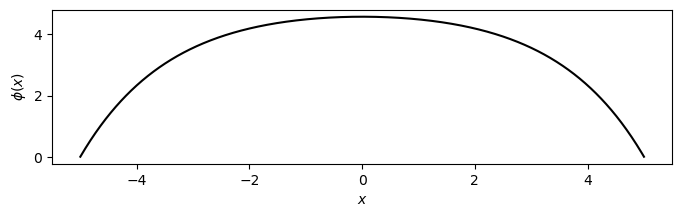

In [68]:
plt.figure(figsize=(8,2))
x = np.linspace(-a/2, a/2, 1000)
plt.plot(x, phi_3(x, 0.0), 'k')
plt.xlabel("$x$"); plt.ylabel("$\phi(x)$");

In [69]:
def blend_colors(color1, color2, ratio):
    """
    Blend two colors in hex format based on a given ratio.

    Args:
        color1 (str): First color in hex format (e.g., "#RRGGBB").
        color2 (str): Second color in hex format (e.g., "#RRGGBB").
        ratio (float): Mixing ratio, a float between 0 and 1.
                      0 means 100% color1, 1 means 100% color2.

    Returns:
        str: Resulting blended color in hex format.
    """
    if not (0 <= ratio <= 1):
        raise ValueError("Ratio must be a float between 0 and 1.")

    # Convert hex colors to RGB tuples
    def hex_to_rgb(hex_color):
        hex_color = hex_color.lstrip("#")
        return tuple(int(hex_color[i:i+2], 16) for i in (0, 2, 4))

    # Convert RGB tuples to hex
    def rgb_to_hex(rgb):
        return f"#{''.join(f'{int(c):02x}' for c in rgb)}"

    rgb1 = hex_to_rgb(color1)
    rgb2 = hex_to_rgb(color2)

    # Blend the colors
    blended_rgb = tuple(
        int((1 - ratio) * c1 + ratio * c2) for c1, c2 in zip(rgb1, rgb2)
    )

    # Return the resulting color in hex format
    return rgb_to_hex(blended_rgb)

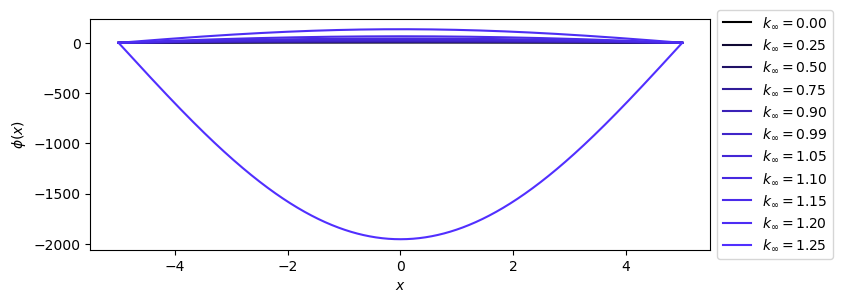

In [76]:
plt.figure(figsize=(8,3))
k_oo_vals = [0.0, 0.25, 0.50, 0.75, 0.9, 0.99, 1.05, 1.1, 1.15, 1.2, 1.25]
for k_oo in k_oo_vals:
    plt.plot(x, phi_3(x, k_oo), color=blend_colors("#000000", "#512fff", k_oo/max(k_oo_vals)),
             label="$k_{{\infty}}={:.2f}$".format(k_oo))
plt.xlabel("$x$"); plt.ylabel("$\phi(x)$");
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [77]:
(np.pi/a)**2*L**2 + 1

1.246740110027234